In [4]:
# This installs the Keras and TensorFlow libraries, which help us build and train models.
!pip install keras tensorflow

In [5]:
# These are the tools we need to work with images, build a CNN model, and show results.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFile
import pandas as pd
from sklearn.metrics import classification_report

In [6]:
# This line helps prevent errors when loading incomplete images during training or testing.
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [22]:
# Here, we are making some changes to the training images like zooming in, flipping, and making them smaller. 
# This helps the model learn better by seeing different versions of the same image.
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True)

# For testing, we only make the images smaller (rescaling) so the model can check how well it learned without other changes.
test_datagen = ImageDataGenerator(rescale=1./255)

# This loads our training images from a folder. The images are resized to 64x64 pixels, and we set the batch size and that it’s a binary (yes/no) problem.
training_set = train_datagen.flow_from_directory('Downloads/Bone-Fracture-Classification/Bone_Dataset/train',
                                                 target_size=(64, 64), 
                                                 batch_size=32, 
                                                 class_mode='binary')

# This loads the test images from a different folder, using the same settings as above.
test_set = test_datagen.flow_from_directory('Downloads/Bone-Fracture-Classification/Bone_Dataset/test',
                                            target_size=(64, 64), 
                                            batch_size=32, 
                                            class_mode='binary')

Found 9246 images belonging to 2 classes.
Found 506 images belonging to 2 classes.


In [23]:
# Now we’re building our CNN model. We start with an empty Sequential model.
classifier = Sequential()

In [24]:
# Adding the first layer: a convolutional layer that looks for patterns in the image, and a max-pooling layer that makes it smaller.
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding another convolutional and max-pooling layer to find more patterns.
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding one more layer to capture even more detailed features.
classifier.add(Conv2D(128, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Now we flatten (make it a single list) all the data from the image.
classifier.add(Flatten())

# Adding a fully connected layer where the model learns the connections between the features.
classifier.add(Dense(units=128, activation='relu'))

# The output layer predicts either fracture (1) or no fracture (0), so we use 'sigmoid'.
classifier.add(Dense(units=1, activation='sigmoid'))

In [25]:
# Compiling the model: this means setting how the model will learn (using 'adam' optimizer) and how it will measure success (using 'accuracy').
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# Training the model for 10 epochs, and checking how it performs on the test set after each round.
history = classifier.fit(training_set, epochs=10, validation_data=test_set)

Epoch 1/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - accuracy: 0.6661 - loss: 0.5972 - val_accuracy: 0.7391 - val_loss: 0.5649
Epoch 2/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 44s 151ms/step - accuracy: 0.8569 - loss: 0.3409 - val_accuracy: 0.8458 - val_loss: 0.4709
Epoch 3/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 38s 129ms/step - accuracy: 0.9307 - loss: 0.1811 - val_accuracy: 0.8992 - val_loss: 0.3001
Epoch 4/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 36s 123ms/step - accuracy: 0.9539 - loss: 0.1164 - val_accuracy: 0.9249 - val_loss: 0.1960
Epoch 5/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 36s 124ms/step - accuracy: 0.9657 - loss: 0.0997 - val_accuracy: 0.9407 - val_loss: 0.1422
Epoch 6/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 131ms/step - accuracy: 0.9785 - loss: 0.0726 - val_accuracy: 0.9545 - val_loss: 0.1219
Epoch 7/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 37s 127ms/step - accuracy: 0.9809 - loss: 0.0582 - val_accuracy: 0.9190 - val_loss: 0.2438
Epoch 8/10
289/289 ━━━━━━━━━━━━━━━━━━━━ 39s 132ms/step - accuracy: 0.9889 - loss: 0

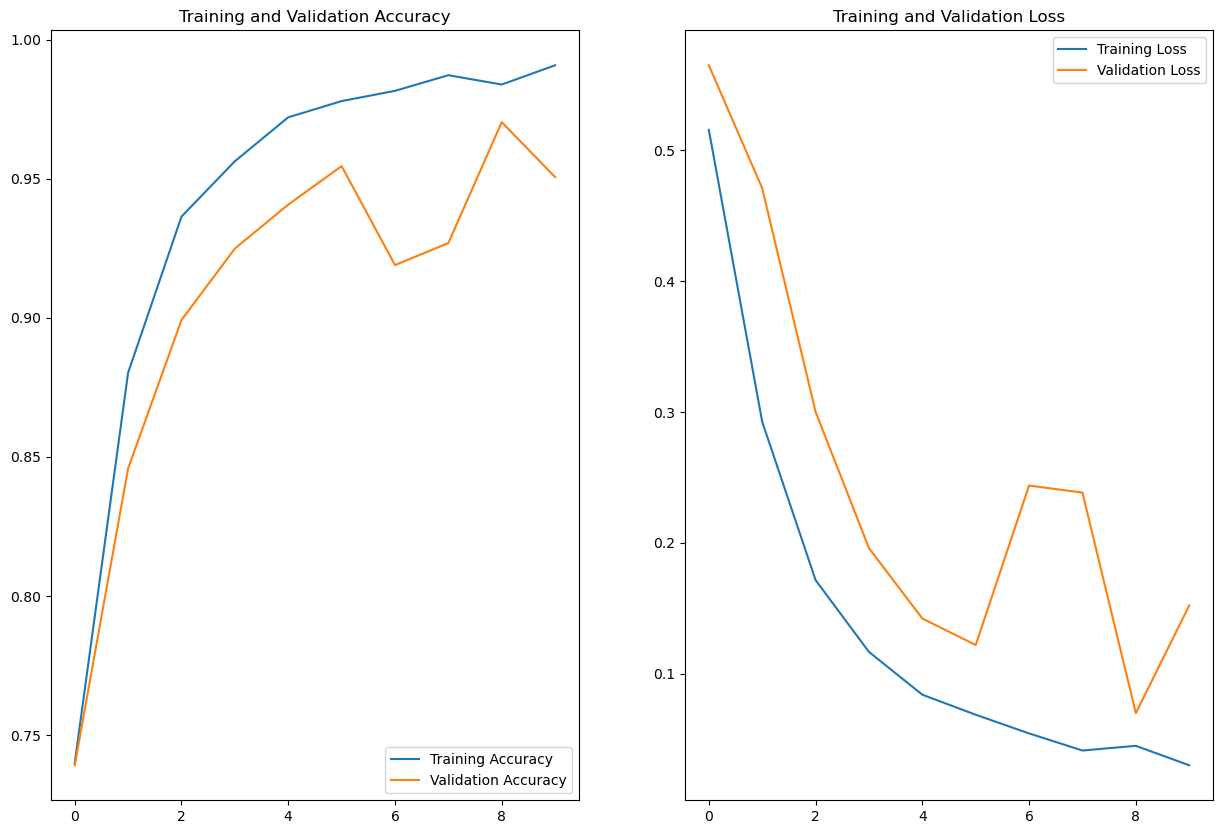

In [27]:
# Plotting the accuracy and loss for both training and testing so we can see how well the model did.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 10))

# This part makes a chart that shows training vs. validation accuracy.
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# This part makes a chart that shows training vs. validation loss.
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [28]:
# This function will let us predict if an uploaded image shows a fracture or not.
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(64, 64))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Make the image smaller (rescaling)
    prediction = model.predict(img_array)
    return prediction[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


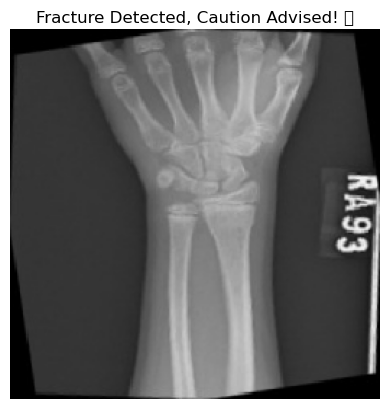

In [29]:
# Path to the image we want to check.
uploaded_image_path = 'Downloads/Bone-Fracture-Classification/Bone_Dataset/train/fractured/1-rotated1-rotated1-rotated1 - Copy (1).jpg'

# Predict if there’s a fracture or not using the function above.
prediction = predict_image(uploaded_image_path, classifier)

# Show the image and the prediction result.
img = image.load_img(uploaded_image_path, target_size=(256, 256))
plt.imshow(img)
plt.axis('off')

# Display a message based on the prediction: no fracture or fracture detected.
if prediction > 0.5:
    plt.title('No Fractures Here, Clear Bones! 🦴')
else:
    plt.title('Fracture Detected, Caution Advised! 🚨')

plt.show()

In [30]:
# Check how good the model is by testing it on the test images.
scores = classifier.evaluate(test_set, verbose=0)
data = {'Metric': ['Accuracy'], 'Score': [scores[1] * 100]}
df = pd.DataFrame(data)

# Print the accuracy score.
evaluation_title = "Evaluation Metrics"
print(f"\n{evaluation_title}\n{'-' * len(evaluation_title)}")
print(df.to_string(index=False))


Evaluation Metrics
------------------
  Metric     Score
Accuracy 95.059288


In [31]:
# Example of a classification report that shows how good the model is at predicting fracture vs. no fracture.
y_true = [0, 1, 0, 1, 0]  # Real labels (ground truth)
y_pred = [0, 1, 0, 0, 1]  # Predicted labels by the model

# Making the classification report and printing it.
report = classification_report(y_true, y_pred, target_names=['No Fracture', 'Fracture'], output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Print the classification report.
print("\nClassification Report:")
print(report_df)


Classification Report:
              precision    recall  f1-score  support
No Fracture    0.666667  0.666667  0.666667      3.0
Fracture       0.500000  0.500000  0.500000      2.0
accuracy       0.600000  0.600000  0.600000      0.6
macro avg      0.583333  0.583333  0.583333      5.0
weighted avg   0.600000  0.600000  0.600000      5.0
